# Formato de los gráficos

## Acerca de los datos
En este NoteBook trabajaremos con dos conjuntos de datos:
- El precio de las acciones de Facebook a lo largo de 2018 (obtenido mediante el[`stock_analysis` package](https://github.com/stefmolin/stock-analysis))
- Centro Europeo para la Prevención y el Control de las Enfermedades (ECDC) [número diario de nuevos casos notificados de COVID-19 por país en todo el mundo](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide) recogido el 19 de septiembre de 2020 a través de [este_enlace](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Títulos y etiquetas de eje
- `plt.suptitle()` añade un título a los gráficos y subgráficos
- `plt.title()` añade un título a un único gráfico. Tenga en cuenta que si utiliza subtrazados, sólo pondrá el título en el último subtrazado, por lo que tendrá que utilizar `plt.suptitle()`.
- `plt.xlabel()` etiqueta el eje x
- `plt.ylabel()` etiqueta el eje y

Text(0, 0.5, 'precio ($)')

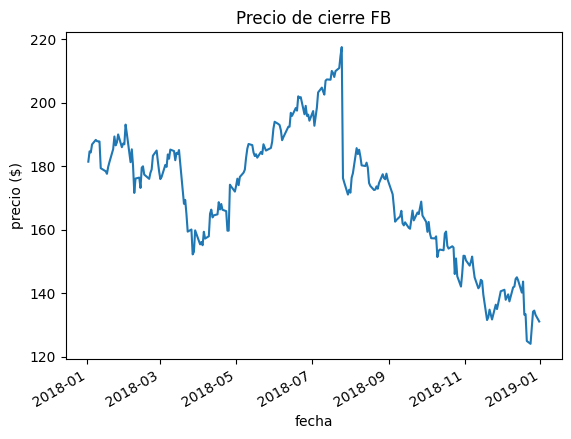

In [2]:
fb.close.plot()
plt.title('Precio de cierre FB')
plt.xlabel('fecha')
plt.ylabel('precio ($)')

### `plt.suptitle()` vs. `plt.title()`
Compruebe lo que ocurre cuando llamamos a `plt.title()` con subplots (y también a `plt.ylabel()`):

Text(0, 0.5, 'precio ($)')

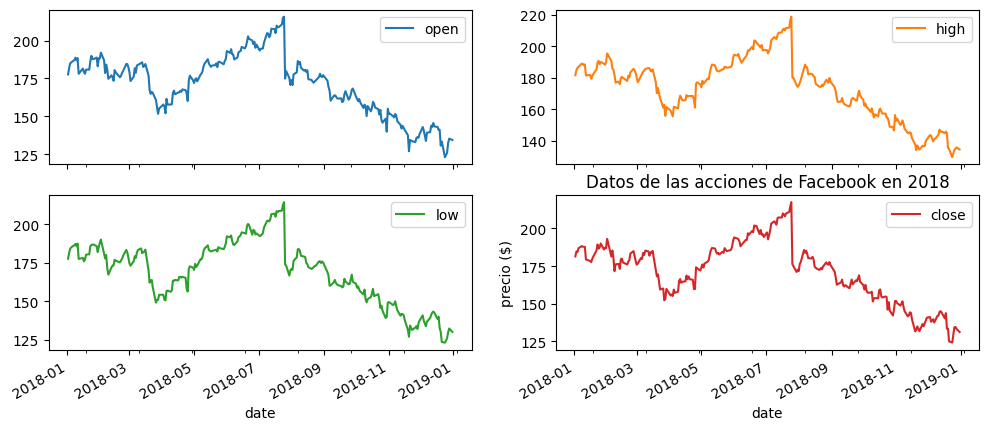

In [3]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Datos de las acciones de Facebook en 2018')
plt.ylabel('precio ($)')

Usando `plt.suptitle()` daremos un título a la figura; para las etiquetas del eje y, necesitamos usar los objetos `Axes` directamente:

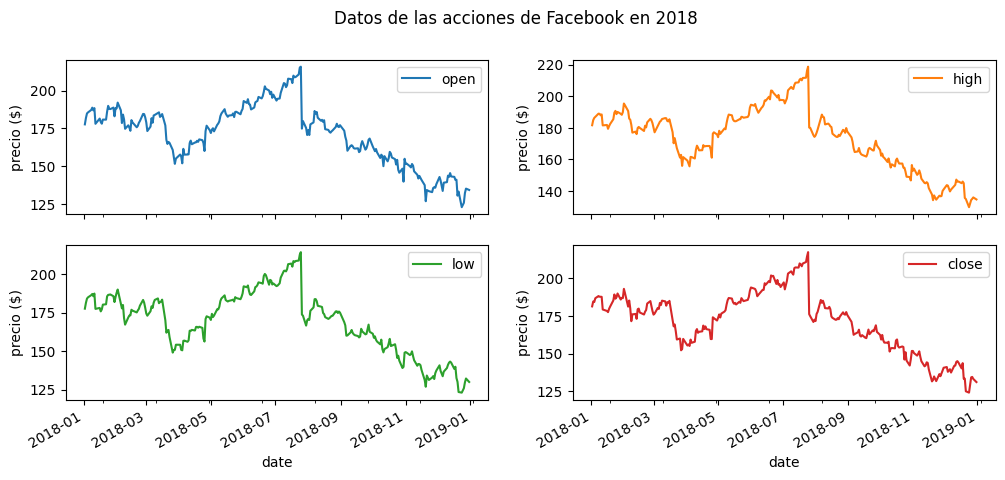

In [4]:
axes = fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Datos de las acciones de Facebook en 2018')
for ax in axes.flatten():
    ax.set_ylabel('precio ($)')

## Leyendas
Matplotlib permite controlar muchos aspectos del aspecto de la leyenda, incluyendo su apariencia y ubicación. He aquí una muestra de los parámetros más utilizados, que veremos a lo largo del libro:

| Parámetro | Propósito |
| --- | --- |
| `loc` | Especifique la ubicación de la leyenda |
| `bbox_to_anchor` | Se utiliza junto con `loc` para especificar la ubicación de la leyenda |
| `ncol` | Establece el número de columnas en que se dividirán las etiquetas, por defecto es 1 |
| `framealpha` | Controla la transparencia del fondo de la leyenda |
| `title` | Dar un título a la leyenda |

`plt.legend()` añade una leyenda al gráfico. Podemos especificar dónde colocarla con el parámetro `loc`:

Text(0, 0.5, 'precio ($)')

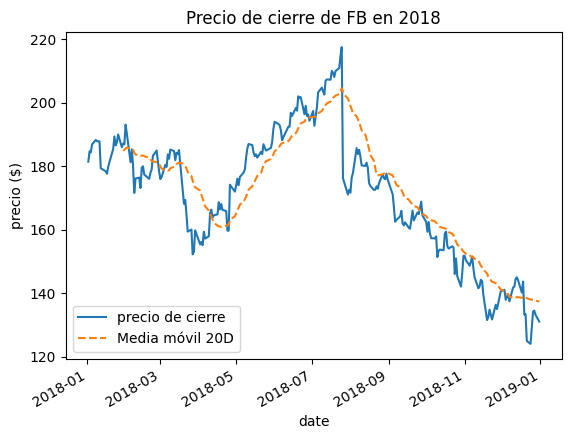

In [5]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'], 
    title='Precio de cierre de FB en 2018',
    label=['precio de cierre', 'Media móvil 20D'],
    style=['-', '--']
)
plt.legend(loc='lower left')
plt.ylabel('precio ($)')

Por defecto, `matplotlib` intenta encontrar la mejor ubicación para la leyenda, pero podemos anularla según nos convenga. Aquí están las ubicaciones generales disponibles, pero ten en cuenta que siempre puedes proporcionar una tupla (x, y) de dónde colocar la leyenda:

| Ubicación String | Código de localización |
| --- | --- |
| `'best'` | `0` |
| `'upper right'` | `1` |
| `'upper left'` | `2` |
| `'lower left'` | `3` |
| `'lower right'` | `4` |
| `'right'` | `5` |
| `'center left'` | `6` |
| `'center right'` | `7` |
| `'lower center'` | `8` |
| `'upper center'` | `9` |
| `'center'` | `10` |

Observa que también hay un método `legend()` en los objetos `Axes`. Usémoslo junto con los argumentos `framealpha` y `ncol` para dar estilo a una leyenda. Vamos a echar un vistazo al porcentaje de nuevos casos de COVID-19 en el mundo que se produjeron en Brasil, China, India, Italia, España y EE.UU. durante el período de 8 meses desde el 18 de enero de 2020 hasta el 18 de septiembre de 2020:

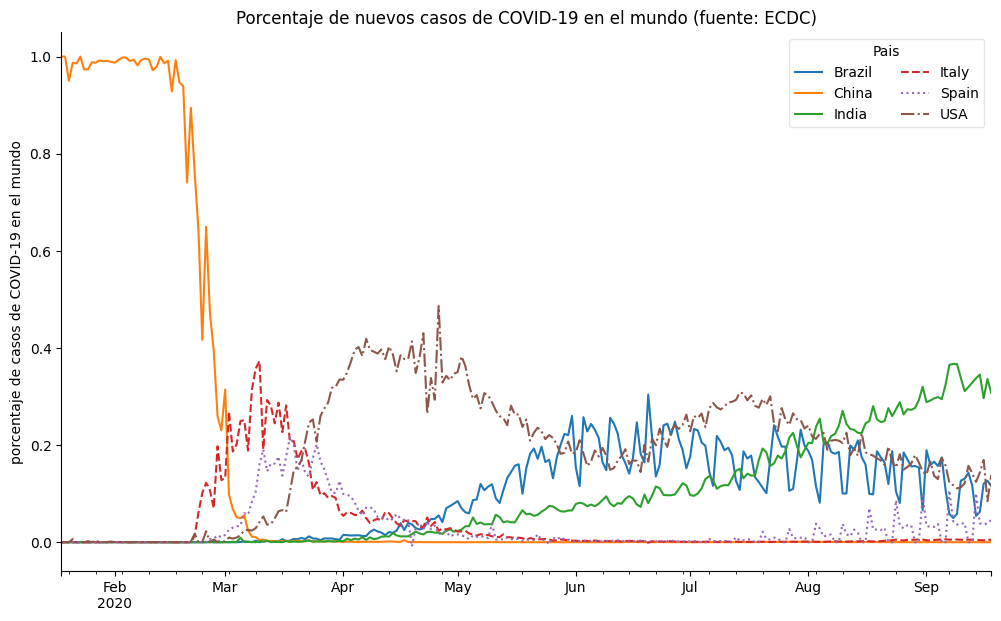

In [7]:
new_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories', values='cases'
).fillna(0)

pct_new_cases = new_cases.apply(lambda x: x / new_cases.apply('sum', axis=1), axis=0)[
    ['Italy', 'China', 'Spain', 'USA', 'India', 'Brazil']
].sort_index(axis=1).fillna(0)

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Porcentaje de nuevos casos de COVID-19 en el mundo (fuente: ECDC)'
)

ax.legend(title='Pais', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('porcentaje de casos de COVID-19 en el mundo')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

## Formateo de ejes
### Especificación de los límites de los ejes
`plt.xlim()`/`plt.ylim()` y `Axes.set_xlim()`/`Axes.set_ylim()` se pueden utilizar para especificar los valores mínimo y máximo del eje. Si se pasa `None`, `matplotlib` determinará el límite.

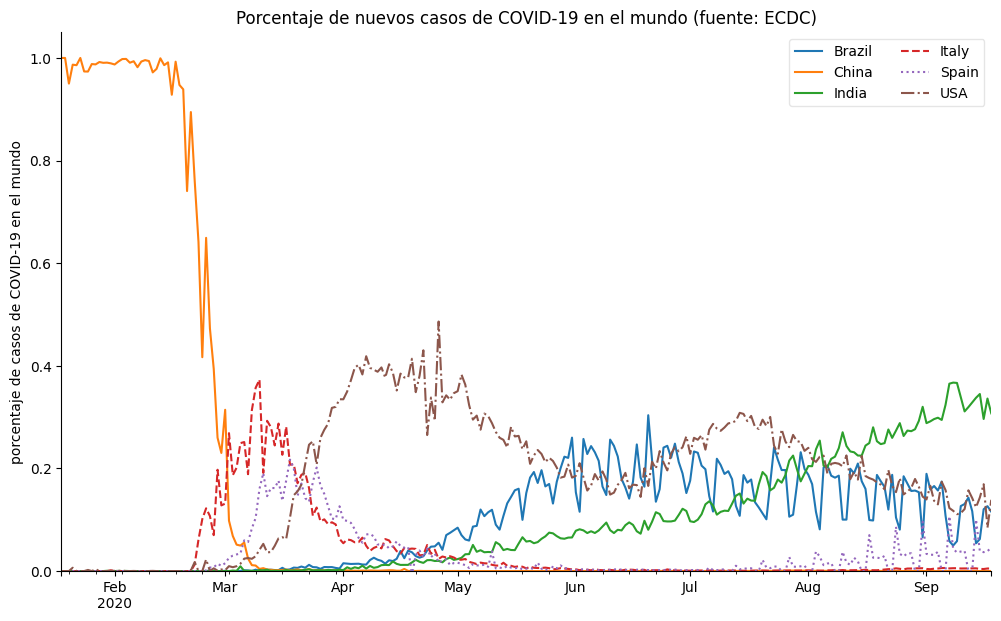

In [8]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Porcentaje de nuevos casos de COVID-19 en el mundo (fuente: ECDC)'
)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('porcentaje de casos de COVID-19 en el mundo')
ax.set_ylim(0, None)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

### Formato de los Ticks del Eje
Podemos utilizar `plt.xticks()` y `plt.yticks()` para proporcionar etiquetas de ticks y especificar qué ticks mostrar. Aquí, mostramos cada mes en el mismo día del mes (el 18):

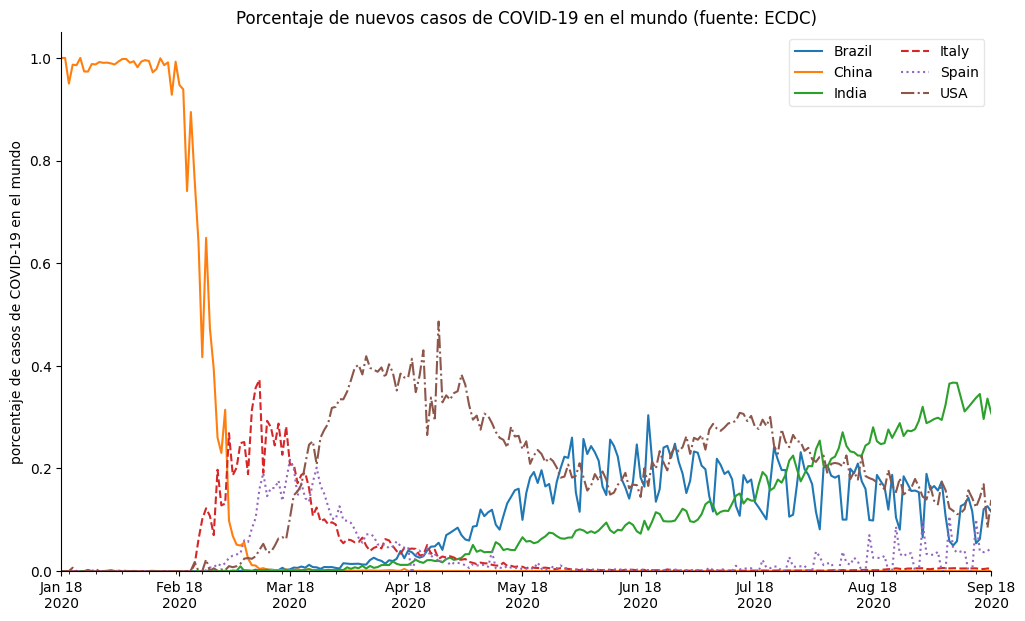

In [9]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Porcentaje de nuevos casos de COVID-19 en el mundo (fuente: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('porcentaje de casos de COVID-19 en el mundo')
ax.set_ylim(0, None)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

#### El módulo `matplotlib.ticker`.
##### `PercentFormatter` (Formateador de porcentajes)
Podemos utilizar la clase `PercentFormatter` para mostrar las etiquetas como porcentajes. Podemos especificar el denominador (`xmax`) a utilizar cuando se calculan los porcentajes. Esto se pasa al método `set_major_formatter()` del `xaxis` o `yaxis` en el `Axes`.

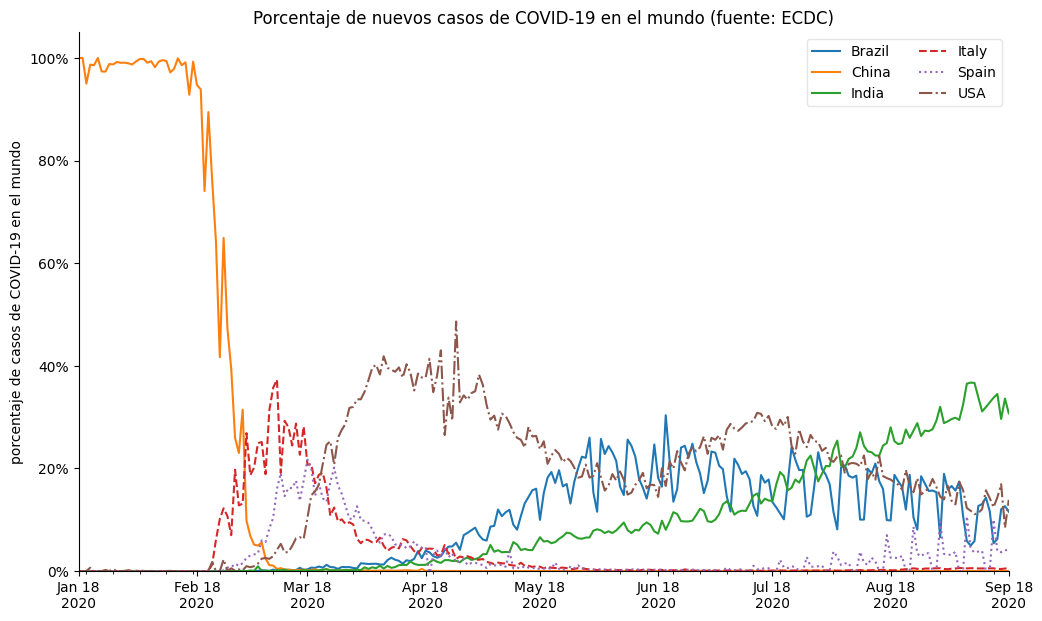

In [10]:
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Porcentaje de nuevos casos de COVID-19 en el mundo (fuente: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(title='', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('porcentaje de casos de COVID-19 en el mundo')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

##### `EngFormatter`
Podemos utilizar la clase `EngFormatter` para aplicar la notación de ingeniería a los ticks.

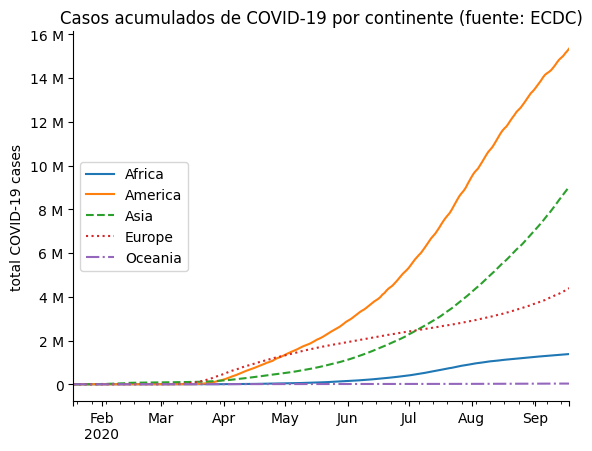

In [11]:
from matplotlib.ticker import EngFormatter

ax = covid.query('continentExp != "Other"').groupby([
    'continentExp', pd.Grouper(freq='1D')
]).cases.sum().unstack(0).apply('cumsum').plot(
    style=['-', '-', '--', ':', '-.'],
    title='Casos acumulados de COVID-19 por continente (fuente: ECDC)'
)

ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

##### `MultipleLocator`
Si trazamos los nuevos casos diarios de COVID-19 en Nueva Zelanda desde el 18 de abril de 2020 hasta el 18 de septiembre de 2020, por defecto, `matplotlib` muestra el eje *y* en incrementos de 2,5, pero sabemos que no es posible tener casos fraccionarios:

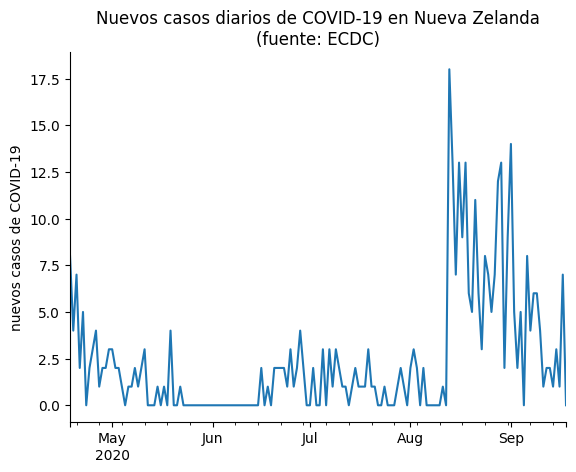

In [12]:
ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='Nuevos casos diarios de COVID-19 en Nueva Zelanda\n(fuente: ECDC)'
)
ax.set(xlabel='', ylabel='nuevos casos de COVID-19')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

Para asegurarnos de que sólo mostramos valores enteros, podemos utilizar la clase `MultipleLocator`. Esto dará ticks para todos los múltiplos de un número especificado con el parámetro `base`:

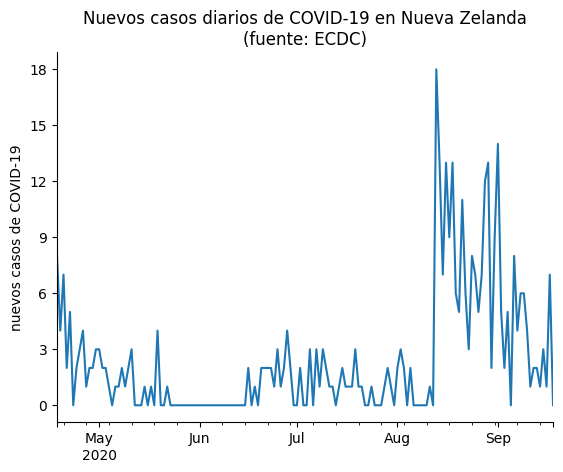

In [13]:
from matplotlib.ticker import MultipleLocator

ax = new_cases.New_Zealand['2020-04-18':'2020-09-18'].plot(
    title='Nuevos casos diarios de COVID-19 en Nueva Zelanda\n(fuente: ECDC)'
)
ax.set(xlabel='', ylabel='nuevos casos de COVID-19')
ax.yaxis.set_major_locator(MultipleLocator(base=3))

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

<hr>
<div>
    <a href="./1-introduccion_a_seaborn.ipynb">
        <button>&#8592; Notebook Anterior</button>
    </a>
    <a href="./3-customizando_visualizaciones.ipynb">
        <button style="float: right;">Proximo Notebook &#8594;</button>
    </a>
</div>
<hr>